<a href="https://colab.research.google.com/github/FeedingDejaj/MAT422/blob/main/3_3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 Unconstrained Optimization

By Abdula Alkhafaji with help from Generative AI.

## 3.3.1 Necessary and Sufficient Conditions of Local Minimizers

**Local minimizers** are points where a function has a lower value than at nearby points. To find these, we use mathematical conditions that involve derivatives of the function.

### Key Concepts:
- **Global Minimizer**: A point where the function attains its absolute minimum over its entire domain.
- **Local Minimizer**: A point where the function attains its minimum within a small neighborhood.
- **Descent Direction**: A direction in which the function value decreases most rapidly.

### Necessary Conditions

For a differentiable function \(f(x)\), a necessary condition for \(x^*\) to be a local minimizer is:
\[
\nabla f(x^*) = 0,
\]
where \(\nabla f(x^*)\) is the gradient of \(f(x)\) at \(x^*\). This means the slope is zero at that point.

### Sufficient Conditions

To confirm that \(x^*\) is a local minimizer, the second derivative (or Hessian matrix in multidimensional cases) must be positive definite:
\[
H = \nabla^2 f(x^*) \succ 0
\]
where \(H\) is the Hessian matrix of \(f(x)\) at \(x^*\).

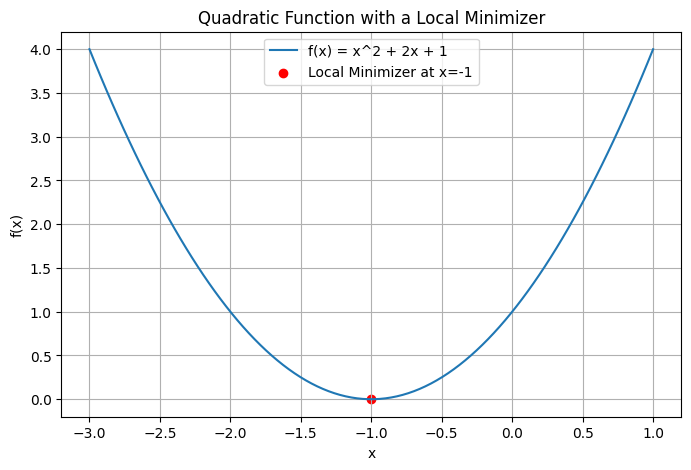

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def f(x):
    return x**2 + 2*x + 1


x = np.linspace(-3, 1, 100)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = x^2 + 2x + 1')
plt.scatter(-1, f(-1), color='red', label='Local Minimizer at x=-1')
plt.title('Quadratic Function with a Local Minimizer')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

## 3.3.2 Convexity and Global Minimizers

Convexity is a property of functions and sets that guarantees the uniqueness of global minimizers. A convex function is one where any line segment drawn between two points on the graph lies above or on the graph.

### Key Concepts:
- **Convex Sets**: A set \(C\) is convex if for any two points \(x, y \in C\), the line segment connecting them is also in \(C\).
- **Convex Functions**: A function \(f(x)\) is convex if:
\[
f(\theta x + (1 - \theta)y) \leq \theta f(x) + (1 - \theta) f(y), \quad \forall x, y \in \text{domain}(f), \theta \in [0, 1].
\]

Convex functions have the property that any local minimizer is also a global minimizer.

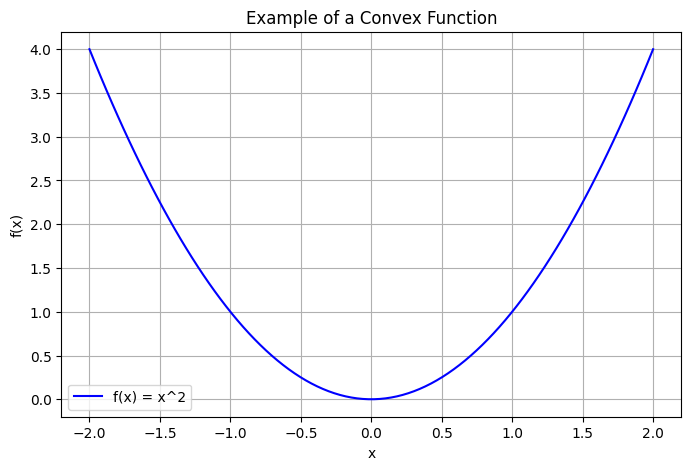

In [2]:
x = np.linspace(-2, 2, 100)
y = x**2

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = x^2', color='blue')
plt.title('Example of a Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

## 3.3.3 Gradient Descent

**Gradient Descent** is an optimization algorithm used to find the minimum of a function. It iteratively moves in the direction of the steepest descent, guided by the gradient.

### Algorithm:
1. Start with an initial guess \(x_0\).
2. Update the guess using:
\[
x_{k+1} = x_k - \eta \nabla f(x_k),
\]
where \(\eta\) is the learning rate.
3. Repeat until convergence.

### Steepest Descent

A variant of gradient descent that chooses the optimal step size at each iteration by solving:
\[
\min_{\eta} f(x_k - \eta \nabla f(x_k)).
\]

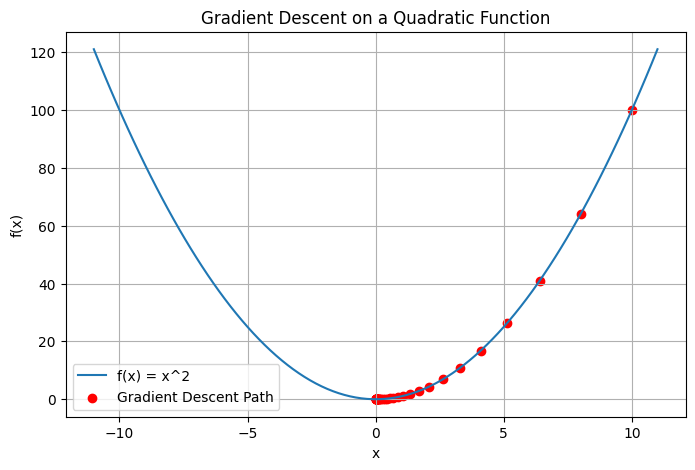

In [3]:
def gradient_descent(f, grad_f, x0, learning_rate, iterations):
    x = x0
    history = [x]
    for _ in range(iterations):
        x = x - learning_rate * grad_f(x)
        history.append(x)
    return x, history


def f(x):
    return x**2

def grad_f(x):
    return 2 * x


x_min, history = gradient_descent(f, grad_f, x0=10, learning_rate=0.1, iterations=50)


x_vals = np.linspace(-11, 11, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x) = x^2')
plt.scatter(history, [f(x) for x in history], color='red', label='Gradient Descent Path')
plt.title('Gradient Descent on a Quadratic Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()